In [16]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# GEVD_Example
#
# Author: Chanchal Chatterjee
#

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [18]:
# Data obtained from USP DS Repository https://sites.google.com/view/uspdsrepository
# Load the data in your unique bucket.
# Here gs://chanchal_book_bucket1/NOAA.csv

In [25]:
#get data here: https://sites.google.com/view/uspdsrepository
dataset   = pd.read_csv("gs://chanchal_book_bucket1/NOAA.csv")
dataset = dataset.dropna()
print(dataset.shape)
print(dataset.head())


(18159, 9)
     F1    F2      F3   F4    F5    F6    F7    F8  Class
0  19.8  14.0  1019.6  8.4   9.9  15.9  28.9  14.0      1
1  26.8  22.2  1006.2  8.1  10.9  19.0  34.0  21.0      1
2  34.6  32.9  1004.6  3.9  13.8  22.0  36.0  33.1      2
3  26.4  21.5  1006.9  8.0  18.7  30.1  39.9  16.0      2
4  14.7   7.9  1009.9  8.1  14.1  22.0  21.0   9.0      1


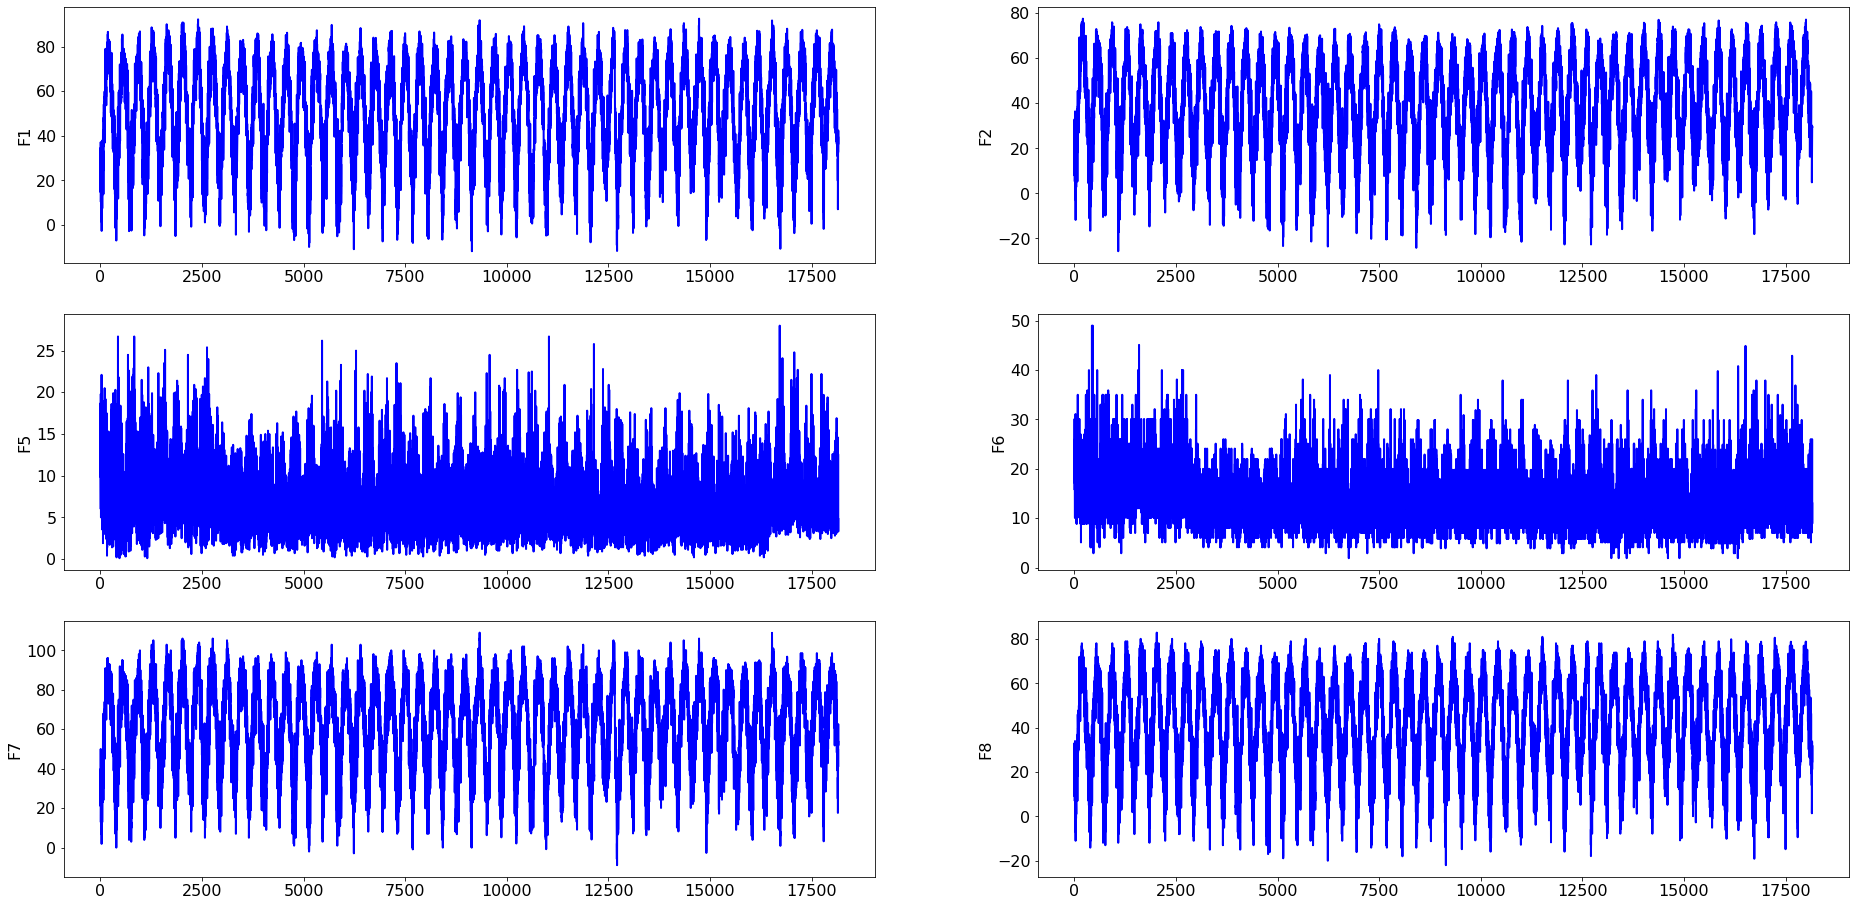

In [26]:
plt.figure(figsize=(32, 16))
plt.rcParams.update({'font.size': 16})
cols = dataset2.columns
for i in range(dataset2.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset2[cols[i]], lw=2, color='b')
plt.show()


In [32]:
# Compute A and B
from numpy import linalg as la

dataset2 = dataset.drop(['Class'],1)
nSamples = dataset2.shape[0]
nDim = dataset2.shape[1]

classes = np.array(dataset['Class']-1)
classes_categorical = tf.keras.utils.to_categorical(classes, num_classes=2)

M = np.zeros(shape=(nDim,2)) # stores adaptive correlation matrix
B = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
for iter in range(nSamples):
    cnt = iter + 1
    x = np.array(dataset2.iloc[iter])
    x = x.reshape(nDim,1)
    B = B + (1.0/cnt)*((np.dot(x, x.T)) - B)
    y = classes_categorical[iter].reshape(2,1)
    M = M + (1.0/cnt)*((np.dot(x, y.T)) - M)
    A = M @ M.T


VTBV=
 [[ 1. -0. -0. -0. -0. -0. -0.  0.]
 [-0.  1. -0. -0.  0.  0. -0.  0.]
 [ 0. -0.  1.  0.  0.  0.  0. -0.]
 [ 0.  0.  0.  1. -0. -0.  0. -0.]
 [-0. -0. -0. -0.  1. -0. -0.  0.]
 [-0. -0. -0. -0. -0.  1. -0. -0.]
 [-0. -0. -0. -0. -0. -0.  1. -0.]
 [-0. -0. -0. -0.  0.  0. -0.  1.]]
VTAV=
 [[45848.45    -0.       0.      -0.      -0.      -0.      -0.      -0.  ]
 [   -0.    8175.46    -0.       0.       0.       0.       0.      -0.  ]
 [    0.      -0.       0.       0.      -0.      -0.      -0.      -0.  ]
 [   -0.       0.       0.       0.      -0.      -0.      -0.       0.  ]
 [    0.       0.       0.      -0.       0.       0.       0.       0.  ]
 [    0.       0.       0.      -0.      -0.      -0.       0.       0.  ]
 [   -0.      -0.      -0.      -0.       0.       0.      -0.      -0.  ]
 [   -0.      -0.      -0.       0.      -0.      -0.      -0.      -0.  ]]


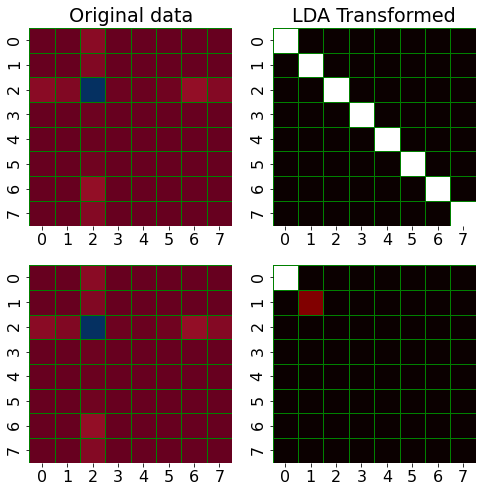

In [39]:
import seaborn as sns
from scipy.linalg import eigh

A = 5*A
eigvals, eigvecs = eigh(A, B)
V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
VTAV = np.around(V.T @ A @ V, 2)
VTBV = np.around(V.T @ B @ V, 2)
print("VTBV=\n", VTBV)
print("VTAV=\n", VTAV)

plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
sns.heatmap(A, linewidth=0.5, linecolor="green", cmap='RdBu', cbar=False)
plt.title("Original data")

plt.subplot(2, 2, 2)
sns.heatmap(VTBV, linewidth=0.5, linecolor="green", cmap='hot', cbar=False)
plt.title("LDA Transformed")

plt.subplot(2, 2, 3)
sns.heatmap(A, linewidth=0.5, linecolor="green", cmap='RdBu', cbar=False)
#plt.title("Original data")

plt.subplot(2, 2, 4)
sns.heatmap(VTAV, linewidth=0.5, linecolor="green", cmap='hot', cbar=False)
#plt.title("LDA Transformed")
plt.show()
